## Test PSF measurement in the stack

and test ZOGY using measured PSFs

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import multiprocessing
from joblib import Parallel, delayed
num_cores = multiprocessing.cpu_count()
if num_cores == 32:
    num_cores = 24  # lsst-dev - don't use all the cores, man.
elif num_cores == 8:
    num_cores = 3
elif num_cores == 4:
    num_cores = 2
print num_cores

import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

class sizeme():
    """ Class to change html fontsize of object's representation"""
    def __init__(self,ob, size=50, height=120):
        self.ob = ob
        self.size = size
        self.height = height
    def _repr_html_(self):
        repl_tuple = (self.size, self.height, self.ob._repr_html_())
        return u'<span style="font-size:{0}%; line-height:{1}%">{2}</span>'.format(*repl_tuple)

pd.options.display.max_columns = 9999
pd.set_option('display.width', 9999)

import warnings
warnings.filterwarnings('ignore')

3


Make a couple of test images to test the PSF measurement on...

In [30]:
import diffimTests as dit
reload(dit)

# Let's try w same parameters as ZOGY paper.
sky = 300.

testObj = dit.DiffimTest(imSize=(512,512), sky=sky, psf1=[1.6,1.6], psf2=[1.8,2.2],
                         offset=[0,0], psf_yvary_factor=0., 
                         varFlux2=[1500., 1600., 1800., 2000., 2200., 2400., 2600., 2800.],
                         variablesNearCenter=False,
                         theta1=0., theta2=-45., im2background=0., n_sources=50, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=21)
testObj.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 0, 'FP': 0, 'TP': 8},
 'SZOGY': {'FN': 1, 'FP': 2, 'TP': 7},
 'ZOGY': {'FN': 0, 'FP': 0, 'TP': 8}}

In [31]:
reload(dit)
res = dit.measurePsf(testObj.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj.im1.psf = res.psf.computeImage().getArray()

res = dit.measurePsf(testObj.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj.im2.psf = res.psf.computeImage().getArray()

testObj.reset()
testObj.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 0, 'FP': 0, 'TP': 8},
 'SZOGY': {'FN': 1, 'FP': 37, 'TP': 7},
 'ZOGY': {'FN': 1, 'FP': 57, 'TP': 7}}

See how it works on a crowded field.

In [32]:
reload(dit)
testObj2 = dit.DiffimTest(imSize=(512,512), sky=sky, psf1=[1.6,1.6], psf2=[1.8,2.2],
                         offset=[0,0], psf_yvary_factor=0., 
                         varFlux2=[1500., 1600., 1800., 2000., 2200., 2400., 2600., 2800.],
                         variablesNearCenter=False,
                         theta1=0., theta2=-45., im2background=0., n_sources=500, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=21)

testObj2.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 0, 'FP': 0, 'TP': 8},
 'SZOGY': {'FN': 0, 'FP': 0, 'TP': 8},
 'ZOGY': {'FN': 0, 'FP': 0, 'TP': 8}}

In [33]:
res = dit.measurePsf(testObj2.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj2.im1.psf = res.psf.computeImage().getArray()

res = dit.measurePsf(testObj2.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj2.im2.psf = res.psf.computeImage().getArray()

testObj2.reset()
testObj2.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 0, 'FP': 0, 'TP': 8},
 'SZOGY': {'FN': 2, 'FP': 17, 'TP': 6},
 'ZOGY': {'FN': 3, 'FP': 44, 'TP': 5}}

Finally a very crowded field!

In [34]:
reload(dit)
testObj3 = dit.DiffimTest(imSize=(512,512), sky=sky, psf1=[1.6,1.6], psf2=[1.8,2.2],
                         offset=[0,0], psf_yvary_factor=0., 
                         varFlux2=[1500., 1600., 1800., 2000., 2200., 2400., 2600., 2800.],
                         variablesNearCenter=False,
                         theta1=0., theta2=-45., im2background=0., n_sources=5000, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=21)

testObj3.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 1, 'FP': 0, 'TP': 7},
 'SZOGY': {'FN': 2, 'FP': 5, 'TP': 6},
 'ZOGY': {'FN': 1, 'FP': 0, 'TP': 7}}

In [35]:
res = dit.measurePsf(testObj3.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj3.im1.psf = res.psf.computeImage().getArray()

res = dit.measurePsf(testObj3.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj3.im2.psf = res.psf.computeImage().getArray()

testObj3.reset()
testObj3.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 1, 'FP': 0, 'TP': 7},
 'SZOGY': {'FN': 8, 'FP': 1, 'TP': 0},
 'ZOGY': {'FN': 8, 'FP': 18, 'TP': 0}}

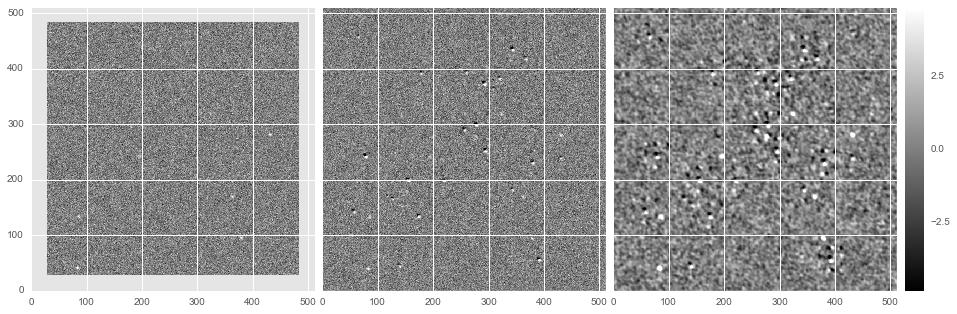

In [40]:
fig = plt.figure(1, (16, 16))
obj = testObj #3
dit.plotImageGrid((obj.res.decorrelatedDiffim, obj.D_ZOGY.im, obj.S_corr_ZOGY.im))